# Importing Libraries

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from deap import base
from deap import creator
from deap import tools
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

In [2]:
# load data
data  = pd.read_csv('C:/Users/Amir Hossein/Desktop/Project/dataset/My-Data.csv')
# data  = data.values
# feat  = np.asarray(data[:, 0:-1])
# label = np.asarray(data[:, -1])

# class for getting the score

In [3]:
class ModelScore:

    def __init__(self, data, model):
        
        
        self.X = data.iloc[:, :-1]
        self.y = data.iloc[:, [-1]]


        # split the data, creating a group of training/validation sets to be used in the k-fold validation process:
#         self.kfold = KFold(n_splits=3)

        pipeline = Pipeline([("scaler", StandardScaler()),
                             ("model", model)])
        self.model = TransformedTargetRegressor(regressor=pipeline,
                                                transformer=StandardScaler())
        self.RKFold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

    def __len__(self):
        """
        :return: the total number of features used in this Regression problem
        """
        return self.X.shape[1]

    def getMeanR2(self, zeroOneList):
        """
        returns the mean r2 measure of the regressor, calculated using repeated-k-fold validation process,
        using the features selected by the zeroOneList
        :param zeroOneList: a list of binary values corresponding the features in the dataset. A value of '1'
        represents selecting the corresponding feature, while a value of '0' means that the feature is dropped.
        :return: the mean R2 measure of the Regressor when using the features selected by the zeroOneList
        """

        # drop the dataset columns that correspond to the unselected features:
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        # perform k-fold validation and determine the accuracy measure of the classifier:
        cv_results = cross_val_score(self.model, currentX, self.y, cv=self.RKFold, scoring='r2', n_jobs=-1)

        # return mean accuracy:
        return np.mean(cv_results)

def main():
    # create a problem instance:
    model = SVR()
    svr = ModelScore(data, model)

    allOnes = [1] * len(svr)
    print("-- All features selected: ", allOnes, ", r2 = ", svr.getMeanR2(allOnes))


if __name__ == "__main__":
    main()

-- All features selected:  [1, 1, 1, 1, 1] , r2 =  0.9107683653115735


# SVR - PSO

C:\Users\Amir Hossein\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Amir Hossein\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Particle' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	max    	avg    
0  	20   	91.0268	43.6821
1  	20   	91.0268	70.0904
2  	20   	91.0268	73.3236
3  	20   	91.0268	76.3351
4  	20   	91.0268	76.0823
5  	20   	91.0268	72.3154
6  	20   	91.0268	78.8513
7  	20   	91.0268	72.4174
8  	20   	91.0268	74.3866
9  	20   	91.0268	73.5676
10 	20   	91.0268	77.7444
11 	20   	91.0268	80.4963
12 	20   	91.0268	79.8598
13 	20   	91.0268	73.1047
14 	20   	91.0268	72.4572
15 	20   	91.0268	79.0071
16 	20   	91.0268	82.0004
17 	20   	91.0268	78.275 
18 	20   	91.0268	78.9098
19 	20   	91.0268	79.4644
20 	20   	91.0268	78.1966
21 	20   	91.0268	81.9409
22 	20   	91.0268	83.177 
23 	20   	91.0268	83.0922
24 	20   	91.0268	78.6647
25 	20   	91.0268	74.5546
26 	20   	91.0268	82.1177
27 	20   	91.0268	83.5136
28 	20   	91.0268	80.8585
29 	20   	91.0268	79.0529
30 	20   	91.0268	84.3831
31 	20   	91.0268	81.9927
32 	20   	91.0268	79.3235
33 	20   	91.0268	81.9412
34 	20   	91.0268	82.9501
35 	20   	91.0268	85.0461
36 	20   	91.0268	83.1545
37 	20   	91

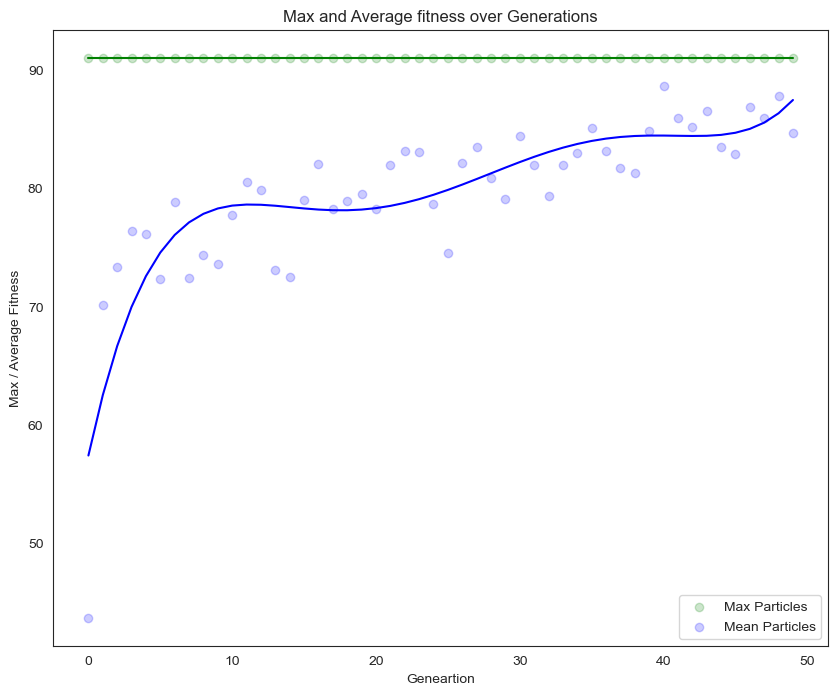

In [5]:
model = SVR()
svr = ModelScore(data, model)

# constants:
DIMENSIONS = len(svr)
POPULATION_SIZE = 20
MAX_GENERATIONS = 50
MIN_START_POSITION, MAX_START_POSITION = 0, 1
MIN_SPEED, MAX_SPEED = -3.0, 3.0
MAX_LOCAL_UPDATE_FACTOR = MAX_GLOBAL_UPDATE_FACTOR = 2.0
FEATURE_PENALTY_FACTOR = 0.01

# set the random seed:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

all_time = list()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(+1.0,))

# define the particle class based on ndarray:
creator.create("Particle", np.ndarray, fitness=creator.FitnessMax, speed=None, best=None)
now = timeit.default_timer()
# create and initialize a new particle:
def createParticle():
    particle = creator.Particle(np.random.randint(low=0,
                                                  high=2,
                                                  size=DIMENSIONS))
    particle.speed = np.random.uniform(MIN_SPEED, MAX_SPEED, DIMENSIONS)
    return particle

# create the 'particleCreator' operator to fill up a particle instance:
toolbox.register("particleCreator", createParticle)


# create the 'population' operator to generate a list of particles:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.particleCreator)


def updateParticle(particle, best):

    # create random factors:
    localUpdateFactor = np.random.randint(0, MAX_LOCAL_UPDATE_FACTOR, particle.size)
    globalUpdateFactor = np.random.randint(0, MAX_GLOBAL_UPDATE_FACTOR, particle.size)

    # calculate local and global speed updates:
    localSpeedUpdate = localUpdateFactor * (particle.best - particle)
    globalSpeedUpdate = globalUpdateFactor * (best - particle)

    # scalculate updated speed:
    particle.speed = particle.speed + (localSpeedUpdate + globalSpeedUpdate)

    # enforce limits on the updated speed:
    particle.speed = np.clip(particle.speed, MIN_SPEED, MAX_SPEED)

    # replace particle position with old-position + speed:
    particle[:] = particle + particle.speed


toolbox.register("update", updateParticle)


def r2_accuracy(particle):
    numFeatureUsed = sum([1 if i !=0 else 0 for i in list(particle)])
    if numFeatureUsed == 0:
        return 0.0,
    else:
        r2_score = svr.getMeanR2(particle)
        return (r2_score * 100) - (numFeatureUsed * FEATURE_PENALTY_FACTOR),


toolbox.register("evaluate", r2_accuracy)



# create the population of particle population:
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

logbook = tools.Logbook()
logbook.header = ["gen", "evals"] + stats.fields

best = None

for generation in range(MAX_GENERATIONS):

    # evaluate all particles in polulation:
    for particle in population:

        # find the fitness of the particle:
        particle.fitness.values = toolbox.evaluate(particle)

        # particle best needs to be updated:
        if particle.best is None or particle.best.size == 0 or particle.best.fitness < particle.fitness:
            particle.best = creator.Particle(particle)
            particle.best.fitness.values = particle.fitness.values

        # global best needs to be updated:
        if best is None or best.size == 0 or best.fitness < particle.fitness:
            best = creator.Particle(particle)
            best.fitness.values = particle.fitness.values

    # update each particle's speed and position:
    for particle in population:
        toolbox.update(particle, best)

    # record the statistics for the current generation and print it:
    logbook.record(gen=generation, evals=len(population), **stats.compile(population))
    print(logbook.stream)
duration = timeit.default_timer() - now
all_time.append(duration)
# print info for best solution found:
print("-- Best Particle = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print("Number of Features Selected: %d" % sum([1 if i !=0 else 0 for i in list(best)]))
print("R2 Score Best Particle: %.3f" % svr.getMeanR2(best))

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

generation = [i for i in range(MAX_GENERATIONS)]
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
sns.set_style("white")
ax = plt.figure(figsize=(10, 8))
ax = plt.axes()
z = np.polyfit(generation,maxFitnessValues,5) 
p = np.poly1d(z)
#     plt.ylim([0.5, 1])
print("Total Time Consumed: %.3f minutes" % float(sum(all_time)/60))
plt.scatter(generation, maxFitnessValues, marker="o", color="green", alpha=0.2, label="Max Particles")
plt.plot(generation, p(generation), '-', color="green")
plt.scatter(generation, meanFitnessValues, marker="o", color="blue", alpha=0.2, label="Mean Particles")
z_mean = np.polyfit(generation,meanFitnessValues,5) 
p_mean = np.poly1d(z_mean)
plt.plot(generation, p_mean(generation), '-', color="blue")
#     ax.set_facecolor("white")
plt.xlabel("Geneartion")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.legend(loc=4)
plt.savefig("C:/Users/Amir Hossein/Desktop/Project/Figures//PSO_SVR50", dpi=1000)
plt.show()

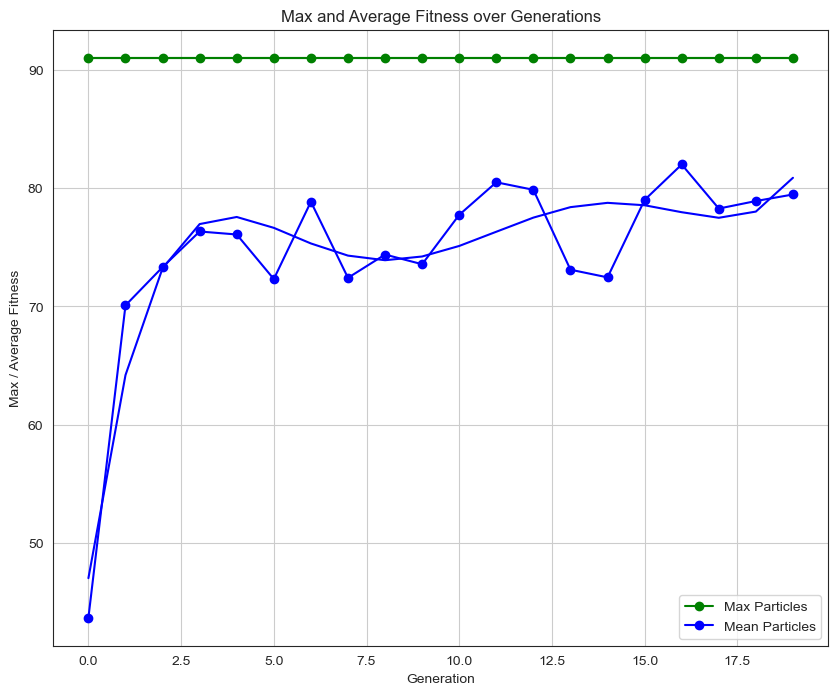

-- Best Particle =  [1 1 1 1 1]
-- Best Fitness =  91.02683653115734
Number of Features Selected: 5
R2 Score Best Particle: 0.911


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Your existing code

# Extract fitness values from the logbook
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# Plotting the fitness values over generations
generation = [i for i in range(MAX_GENERATIONS)]

plt.figure(figsize=(10, 8))
sns.set_style("white")

# Plot Max Fitness values
plt.plot(generation, maxFitnessValues, marker="o", color="green", label="Max Particles")
z = np.polyfit(generation, maxFitnessValues, 5)
p = np.poly1d(z)
plt.plot(generation, p(generation), '-', color="green")

# Plot Mean Fitness values
plt.plot(generation, meanFitnessValues, marker="o", color="blue", label="Mean Particles")
z_mean = np.polyfit(generation, meanFitnessValues, 5)
p_mean = np.poly1d(z_mean)
plt.plot(generation, p_mean(generation), '-', color="blue")

plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average Fitness over Generations")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display information about the best particle
print("-- Best Particle = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print("Number of Features Selected: %d" % sum([1 if i != 0 else 0 for i in list(best)]))
print("R2 Score Best Particle: %.3f" % svr.getMeanR2(best))
